# Problem definition:

R&D department wants to create a new ramen product, and would like to have key characteristics of high-ratings ramen in the world.


# Gather the data:

The dataset is from a product review website - Ramen Rater - a hardcore ramen enuthusiast, with over 2,500 reviews to data, from 2012 to 2016.

There are a total of 2,580 oberservations with 7 features provided.




In [1]:
# Import required libraries

import pandas as pd                     
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns


In [2]:
# Import dataset
ramen = pd.read_csv("ramen-ratings-dataset.csv")

# Structure of the dataset
ramen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [3]:
# Read first few rows of ramen ratings data
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# Clean Data

In [4]:
### Convert to categorical datatype

cols = ['Brand', 'Variety', 'Style', 'Country']
for column in cols:
        ramen[column] = ramen[column].astype("category")

# Check the data types in dataframe after conversion
ramen.dtypes


Review #       int64
Brand       category
Variety     category
Style       category
Country     category
Stars         object
Top Ten       object
dtype: object

In [5]:
### Cleaning Stars column

# Since Stars column is the only feature which is numeric, we need to convert its data type to numeric.
# Considered a missing/bad numeric value - coerce invalid values to NaN
ramen["Stars"] = pd.to_numeric(ramen["Stars"],  errors='coerce')

# Check the data types in dataframe
ramen.dtypes


Review #       int64
Brand       category
Variety     category
Style       category
Country     category
Stars        float64
Top Ten       object
dtype: object

In [6]:
# Rename column Top.Ten to TopTen for easy data manipulation
ramen = ramen.rename({'Top Ten': 'TopTen'}, axis='columns')

ramen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Review #  2580 non-null   int64   
 1   Brand     2580 non-null   category
 2   Variety   2580 non-null   category
 3   Style     2578 non-null   category
 4   Country   2580 non-null   category
 5   Stars     2577 non-null   float64 
 6   TopTen    41 non-null     object  
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 171.7+ KB


In [7]:
### Cleaning Top.Ten column 

# Replace missing values with "None"
ramen["TopTen"].fillna("None", inplace = True)

# Replace "" and "\n" with "None"
ramen["TopTen"].replace({"": "None", "\n": "None"}, inplace=True)

# Structure of the dataset
ramen.info()

ramen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Review #  2580 non-null   int64   
 1   Brand     2580 non-null   category
 2   Variety   2580 non-null   category
 3   Style     2578 non-null   category
 4   Country   2580 non-null   category
 5   Stars     2577 non-null   float64 
 6   TopTen    2580 non-null   object  
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 171.7+ KB


,Review #,Brand,Variety,Style,Country,Stars,TopTen
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,None
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,None
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,None
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,None
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,None
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,None
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,None
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,None
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,None


In [8]:
### Remove rows with missing values - NaN
    
ramen.dropna(axis = 0, inplace = True)

# Structure of the dataset after removing rows with missing values in selected columns
ramen.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Review #  2575 non-null   int64   
 1   Brand     2575 non-null   category
 2   Variety   2575 non-null   category
 3   Style     2575 non-null   category
 4   Country   2575 non-null   category
 5   Stars     2575 non-null   float64 
 6   TopTen    2575 non-null   object  
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 191.5+ KB


# Understanding/Visualizing the data

In [9]:
# Summary Statistics in ramen dataset
ramen.describe()

,Review #,Stars
count,2575.000000,2575.000000
mean,1290.225631,3.654893
std,744.318327,1.015641
min,1.000000,0.000000
25%,646.500000,3.250000
50%,1290.000000,3.750000
75%,1934.500000,4.250000
max,2580.000000,5.000000


In [10]:
# Frequency count of column Brand in desending order
count_brand = ramen['Brand'].value_counts()
print(count_brand)

Nissin             381
Nongshim            98
Maruchan            76
Mama                71
Paldo               66
                  ... 
Liang Cheng Mai      1
Lipton               1
Samurai Ramen        1
Lishan               1
1 To 3 Noodles       1
Name: Brand, Length: 355, dtype: int64


The brand most reviewed is Nissin from Japan.

In [11]:
# Extract Nissin ramen details
# Select a subset of our data using criteria
ramen[ramen.Brand == 'Nissin']


,Review #,Brand,Variety,Style,Country,Stars,TopTen
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,None
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,None
14,2566,Nissin,Demae Ramen Bar Noodle Aka Tonkotsu Flavour In...,Pack,Hong Kong,5.00,None
20,2560,Nissin,Cup Noodles Laksa Flavour,Cup,Hong Kong,4.25,None
27,2553,Nissin,Hakata Ramen Noodle White Tonkotsu,Bowl,Japan,4.75,None
...,...,...,...,...,...,...,...
2553,27,Nissin,Demae Ramen Curry Flavor,Pack,Japan,4.00,None
2554,26,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4.00,None
2555,25,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3.00,None
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.00,None


It seems that Nissin has set up subsidiaries in other countries, hence, some of reviewed ramens does not come from Japan directly.

In [12]:
# Frequency count of column Style in desending order
count_style = ramen['Style'].value_counts()
print(count_style)

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64


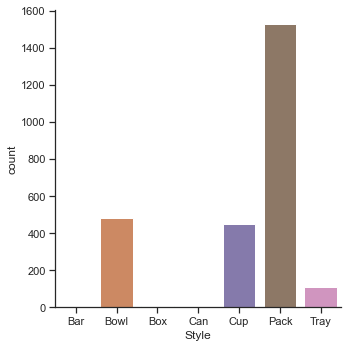

In [13]:
# To find the most common ramen style being reviewed in category plot

sns.set_theme(style="ticks")
  
g = sns.catplot(x="Style",
                kind="count",
                data=ramen)


The most commonly review style is Pack.

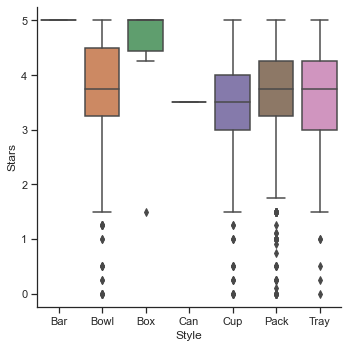

In [14]:
#To view what ramen styles are with the best reviews (above average scale)
# Seeing trends between 2 categorical data - Style, Stars

sns.catplot(x='Style', 
            y='Stars',
            data=ramen,
            kind='box');


Though the most common style is pack version, the above average reviews tend to go to pack version, however, box style seems to be also getting very high reviews.

In [15]:
# Extract box ramen details
# Select a subset of our data using criteria
ramen[ramen.Style == 'Box']


,Review #,Brand,Variety,Style,Country,Stars,TopTen
36,2544,Lipton,Cup-A-Soup Chicken Noodle With White Meat Inst...,Box,USA,1.50,None
80,2500,The Ramen Rater Select,Supreme Creamy Tom Yum Noodle,Box,Malaysia,5.00,None
139,2441,MyKuali,Penang Hokkien Prawn Flavor Noodle,Box,Japan,5.00,None
161,2419,MyKuali,Penang Red Tom Yum Goong,Box,Japan,5.00,None
203,2377,MyKuali,Penang White Curry Instant Noodle (Japan Version),Box,Malaysia,5.00,None
1471,1109,La Fonte,Spaghetti With Bolognese Sauce,Box,Indonesia,4.25,None


None of the box ramen were in Top Ten, however, they are scoring above 4, except for one ramen which scored 1.5.

The number of reviewed box ramen is also too small.

In [16]:
# Frequency count of column Country in desending order
count_country = ramen['Country'].value_counts()
print(count_country)

Japan            352
USA              323
South Korea      307
Taiwan           223
Thailand         191
China            168
Malaysia         155
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Fiji               4
Poland             4
Sarawak            3
Dubai              3
Sweden             3
Finland            3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64


Most of the reviewed Ramens are from Japan, USA, South Korea, and Taiwan.

In [17]:
# To find the brands under USA

USA_df = ramen[ramen.Country == 'USA']

count_usa_brand = USA_df['Brand'].value_counts()
print(count_usa_brand)


Nissin            95
Maruchan          51
Nongshim          35
Annie Chun's      12
Yamachan          11
                  ..
Kang Shi Fu        0
Kamfen             0
Kailo              0
Kabuto Noodles     0
iNoodle            0
Name: Brand, Length: 355, dtype: int64


It seems that those ramen brands in USA come from Asian countries.

In [18]:
# Frequency count of column Stars in desending order
count_stars = ramen['Stars'].value_counts()
print(count_stars)

4.000    393
5.000    386
3.750    349
3.500    335
3.000    175
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.300      2
2.800      2
1.100      2
3.100      2
4.125      2
2.900      2
3.650      1
3.200      1
2.850      1
3.600      1
3.400      1
3.700      1
3.300      1
0.100      1
2.125      1
3.125      1
0.900      1
2.100      1
0.750      1
1.800      1
Name: Stars, dtype: int64


<AxesSubplot:ylabel='Frequency'>

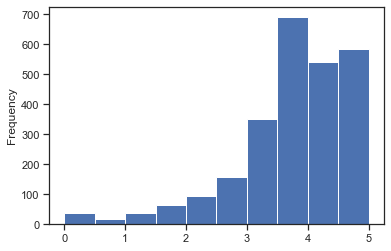

In [19]:
# Histogram of Stars
ramen['Stars'].plot.hist()

Majority of the reviews are towards "more than average".

In [20]:
# Extract Top Ten ramen details
# Select a subset of our data using criteria
Top_Ten_df = ramen[ramen.TopTen != 'None']

# Print the no. of rows in Top Ten dataset
print("No of Top Ten ramen from 2012 to 2016: ")
print(len(Top_Ten_df.index))

# Print the observations in Top Ten dataset
display(Top_Ten_df)


No of Top Ten ramen from 2012 to 2016: 
37


,Review #,Brand,Variety,Style,Country,Stars,TopTen
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


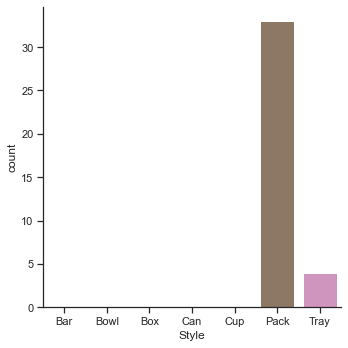

In [21]:
# To view what ramen styles in Top Ten over 2012 - 2016 in category plot

sns.set_theme(style="ticks")
  
T = sns.catplot(x="Style",
                kind="count",
                data=Top_Ten_df)

Looking at the Top Ten details from 2012 to 2016, majority are in Pack version, with a few in Tray version. 

In [22]:
#To view which Country has the most Top Ten ramens
count_topten_country = Top_Ten_df['Country'].value_counts()
print(count_topten_country)

Singapore        7
Japan            6
Malaysia         6
South Korea      5
Indonesia        4
Thailand         3
Taiwan           2
USA              1
China            1
Myanmar          1
Hong Kong        1
Pakistan         0
Netherlands      0
United States    0
Nigeria          0
Poland           0
Philippines      0
UK               0
Sarawak          0
Sweden           0
Nepal            0
Australia        0
Mexico           0
Bangladesh       0
India            0
Hungary          0
Holland          0
Ghana            0
Germany          0
Finland          0
Fiji             0
Estonia          0
Dubai            0
Colombia         0
Canada           0
Cambodia         0
Brazil           0
Vietnam          0
Name: Country, dtype: int64


In the Top Ten data, majority comes from Asia countries. 


# Present Findings and Insights

The brand Nissin is currently the leading ramen market player. Besides being a Japanese brand, it also establishes its subsidiaries across other countries like Germany, USA, India, etc.

Majority of the ramen brands were from Asia (Japan, South Korea, Taiwan, Thailand, etc).
However, many asian ramen companies build subsidiaries in other countries. Thus, making USA came in as 2nd position, in terms of country ranking of where the ramens come from.

More than half of the ramen are in Packet, followed by Bowl and Cup. Though very few ramen in Box packaging are available in the market, they are receiving very good reviews. 

In the current ramen market, more than half of the reviewed ramen are above average reviews. 
This would mean the ramen market is very competitive.

If we need to market a new product, in terms of packaging style, Box style can be considered to be part of the BLUE OCEAN STRATEGY, to shy away from the standard packaging - pack, bowl or cup styles, to attract consumers. 

Ramen flavour data is desired for further data analysis. 

(BLUE OCEAN STRATEGY is the simultaneous pursuit of differentiation and low cost to open up a new market space and create new demand. It is about creating and capturing uncontested market space, thereby making the competition irrelevant.)

# Save the cleaned dataset

In [182]:
# Save the cleaned dataset as csv

#ramen.to_csv (r'C:\Users\Xiaojun\Documents\My Data Science projects\1 - Ramen\ramen_cleaned_Python.csv', index = False, header=True)

ramen.to_csv (r'ramen_cleaned_Python.csv', index = False, header=True)